In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read CSV
LoanStats_df = pd.read_csv("LoanStats_2017Q4.csv")
LoanStats_df.head()
#type(LoanStats_df)
#LoanStats_df.dtypes
#LoanStats_df.shape
#LoanStats_df.columns

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,title,addr_state,dti
0,35000,60 months,0.12,B,B5,< 1 year,RENT,65000.0,Debt consolidation,CA,26.81
1,6000,36 months,0.07,A,A4,1 year,RENT,65000.0,Debt consolidation,NJ,8.35
2,40000,36 months,0.06,A,A2,< 1 year,MORTGAGE,60000.0,Debt consolidation,DC,25.46
3,10000,60 months,0.24,E,E2,10+ years,RENT,42000.0,Credit card refinancing,AR,31.17
4,27000,60 months,0.10,B,B2,3 years,RENT,68000.0,Debt consolidation,TX,30.04


In [3]:
VolumeByStateL1_df = LoanStats_df[["addr_state","loan_amnt"]]
VolumeByStateL2_df = VolumeByStateL1_df.groupby("addr_state").sum().reset_index()
#VolumeByStateL2_df

In [4]:
TotalVolume = VolumeByStateL2_df["loan_amnt"].sum()
VolumeByStateL2_df["Proportion"]= VolumeByStateL2_df["loan_amnt"]/TotalVolume

#df['New Value'] = np.where(df['E'] == 'ABC', df['C'], df['E'])
VolumeByStateL2_df["State"]=np.where(VolumeByStateL2_df["Proportion"]>0.04,VolumeByStateL2_df["addr_state"],"Other")
VolumeByStateL3_df = VolumeByStateL2_df[["State","loan_amnt"]]
VolumeByStateL4_df = VolumeByStateL3_df.groupby("State").sum().reset_index()
#VolumeByStateL4_df

In [5]:
VolumeByStateL4_df.sort_values(by=["loan_amnt"], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
VolumeByStateL4_df

,State,loan_amnt
4,Other,1041693225
0,CA,261337350
5,TX,158191050
3,NY,145629250
1,FL,132782250
2,IL,77721000


In [6]:
plt.title("Loan Volume by State")

# Labels for the sections of our pie chart
labels = VolumeByStateL4_df["State"]

# The values of each section of the pie chart
sizes = VolumeByStateL4_df["loan_amnt"]

# The colors of each section of the pie chart
#colors = TotalFaresbyCityTypeL3_df["Color"]


In [7]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(x=sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x217b243fc88>,
 [Text(-0.4964,-0.981624,'Other'),
  Text(1.07502,0.233084,'CA'),
  Text(0.649889,0.887493,'TX'),
  Text(0.117319,1.09373,'NY'),
  Text(-0.402309,1.02379,'FL'),
  Text(-0.740344,0.813567,'IL')],
 [Text(-0.270764,-0.535432,'57.3%'),
  Text(0.586376,0.127137,'14.4%'),
  Text(0.354485,0.484087,'8.7%'),
  Text(0.0639924,0.596578,'8.0%'),
  Text(-0.219441,0.558431,'7.3%'),
  Text(-0.403824,0.443764,'4.3%')])

In [8]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1108491410559405,
 1.110297607703199,
 -1.1028417491584903,
 1.1035482841187811)

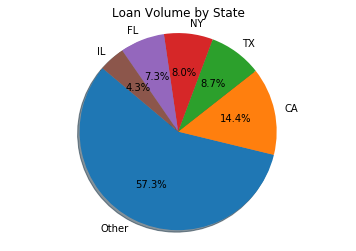

In [9]:
# Prints our pie chart to the screen
plt.show()

In [10]:
VolumeByTypeL1_df = LoanStats_df[["title","loan_amnt"]]
VolumeByTypeL2_df = VolumeByTypeL1_df.groupby("title").sum().reset_index()
VolumeByTypeL2_df["Type"]=VolumeByTypeL2_df["title"]
VolumeByTypeL2_df

,title,loan_amnt,Type
0,Business,28267000,Business
1,Car financing,14009375,Car financing
2,Credit card refinancing,382550500,Credit card refinancing
3,Debt consolidation,1033912725,Debt consolidation
4,Green loan,934825,Green loan
5,Home buying,22743050,Home buying
6,Home improvement,133144600,Home improvement
7,Learning and training,6000,Learning and training
8,Major purchase,47060425,Major purchase
9,Medical expenses,19421850,Medical expenses


In [11]:
TotalVolume = VolumeByTypeL2_df["loan_amnt"].sum()
VolumeByTypeL2_df["Proportion"]= VolumeByTypeL2_df["loan_amnt"]/TotalVolume

#df['New Value'] = np.where(df['E'] == 'ABC', df['C'], df['E'])
VolumeByTypeL2_df["Type"]=np.where(VolumeByTypeL2_df["Proportion"]>0.04,VolumeByTypeL2_df["title"],"Other")
VolumeByTypeL3_df = VolumeByTypeL2_df[["Type","loan_amnt"]]
VolumeByTypeL4_df = VolumeByTypeL3_df.groupby("Type").sum().reset_index()
VolumeByTypeL4_df

,Type,loan_amnt
0,Credit card refinancing,382550500
1,Debt consolidation,1033912725
2,Home improvement,133144600
3,Other,267746300


In [12]:
VolumeByTypeL4_df.sort_values(by=["loan_amnt"], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
VolumeByTypeL4_df

,Type,loan_amnt
1,Debt consolidation,1033912725
0,Credit card refinancing,382550500
3,Other,267746300
2,Home improvement,133144600


In [13]:
plt.title("Loan Volume by Loan Type")

# Labels for the sections of our pie chart
labels = VolumeByTypeL4_df["Type"]

# The values of each section of the pie chart
sizes = VolumeByTypeL4_df["loan_amnt"]

# The colors of each section of the pie chart
#colors = TotalFaresbyCityTypeL3_df["Color"]


In [14]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(x=sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x217b2957048>,
 [Text(-0.509558,-0.974859,'Debt consolidation'),
  Text(1.01481,0.424456,'Credit card refinancing'),
  Text(0.0555296,1.0986,'Other'),
  Text(-0.659121,0.880659,'Home improvement')],
 [Text(-0.277941,-0.531741,'56.9%'),
  Text(0.553532,0.231521,'21.0%'),
  Text(0.0302888,0.599235,'14.7%'),
  Text(-0.35952,0.480359,'7.3%')])

In [15]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1116697801270792,
 1.1250067434386302,
 -1.1051577825393928,
 1.1071053315657198)

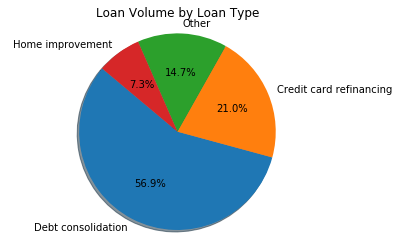

In [16]:
# Prints our pie chart to the screen
plt.show()

In [17]:
LoanCountByLoanTypeL1_df = LoanStats_df[["title","loan_amnt"]]
LoanCountByLoanTypeL2_df = LoanCountByLoanTypeL1_df.groupby("title").count().reset_index()
LoanCountByLoanTypeL2_df = LoanCountByLoanTypeL2_df.rename(columns = {'loan_amnt':'Count'})
LoanCountByLoanTypeL2_df

,title,Count
0,Business,1493
1,Car financing,1393
2,Credit card refinancing,25308
3,Debt consolidation,62451
4,Green loan,76
5,Home buying,1438
6,Home improvement,8678
7,Learning and training,1
8,Major purchase,3228
9,Medical expenses,1964


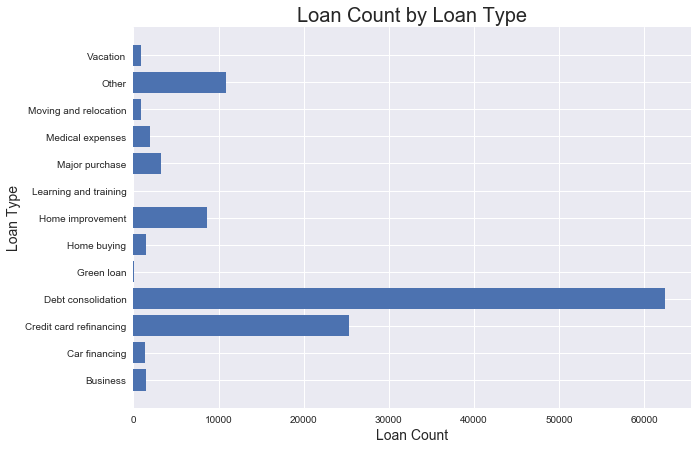

In [18]:
x=LoanCountByLoanTypeL2_df["title"]
y=LoanCountByLoanTypeL2_df["Count"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Loan Count by Loan Type", fontsize =20)
plt.xlabel("Loan Count", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [19]:
RateByLoanTypeL1_df = LoanStats_df[["title","int_rate"]]
RateByLoanTypeL2_df = RateByLoanTypeL1_df.groupby("title").mean().reset_index()
RateByLoanTypeL2_df.dtypes

title        object
int_rate    float64
dtype: object

In [20]:
RateByLoanTypeL2_df.sort_values(by=["int_rate"], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
RateByLoanTypeL2_df

,title,int_rate
7,Learning and training,0.210000
4,Green loan,0.145395
3,Debt consolidation,0.134243
0,Business,0.132599
10,Moving and relocation,0.132511
11,Other,0.129490
9,Medical expenses,0.126762
12,Vacation,0.125711
5,Home buying,0.124729
8,Major purchase,0.124669


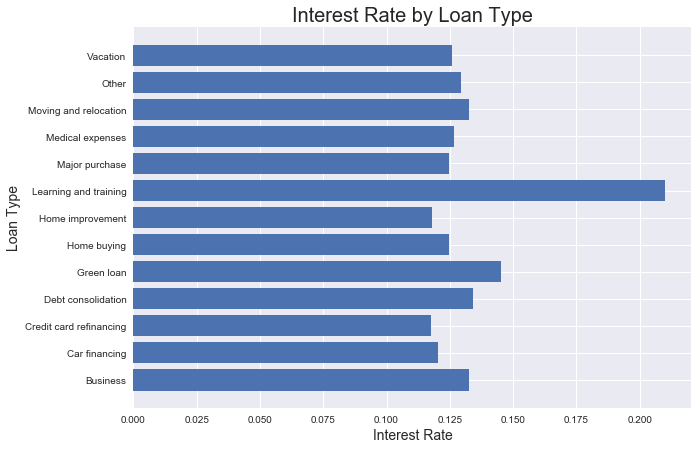

In [21]:
x=RateByLoanTypeL2_df["title"]
y=RateByLoanTypeL2_df["int_rate"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Interest Rate by Loan Type", fontsize =20)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [22]:
LoanSizeByLoanTypeL1_df = LoanStats_df[["title","loan_amnt"]]
LoanSizeByLoanTypeL2_df = LoanSizeByLoanTypeL1_df.groupby("title").mean().reset_index()
LoanSizeByLoanTypeL2_df

,title,loan_amnt
0,Business,18933.020764
1,Car financing,10056.981335
2,Credit card refinancing,15115.793425
3,Debt consolidation,16555.583177
4,Green loan,12300.328947
5,Home buying,15815.751043
6,Home improvement,15342.774833
7,Learning and training,6000.000000
8,Major purchase,14578.818154
9,Medical expenses,9888.925662


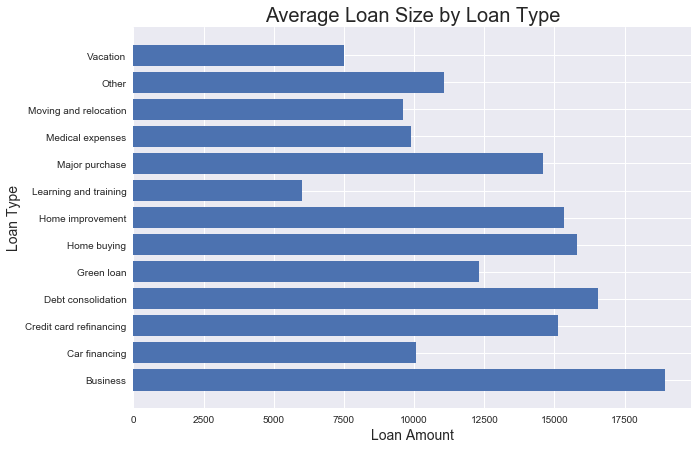

In [23]:
x=LoanSizeByLoanTypeL2_df["title"]
y=LoanSizeByLoanTypeL2_df["loan_amnt"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Average Loan Size by Loan Type", fontsize =20)
plt.xlabel("Loan Amount", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [24]:
RateByGradeL1_df = LoanStats_df[["grade","int_rate"]]
RateByGradeL2_df = RateByGradeL1_df.groupby("grade").mean().reset_index()
RateByGradeL2_df

,grade,int_rate
0,A,0.068350
1,B,0.103669
2,C,0.143246
3,D,0.188350
4,E,0.248333
5,F,0.299234
6,G,0.310000


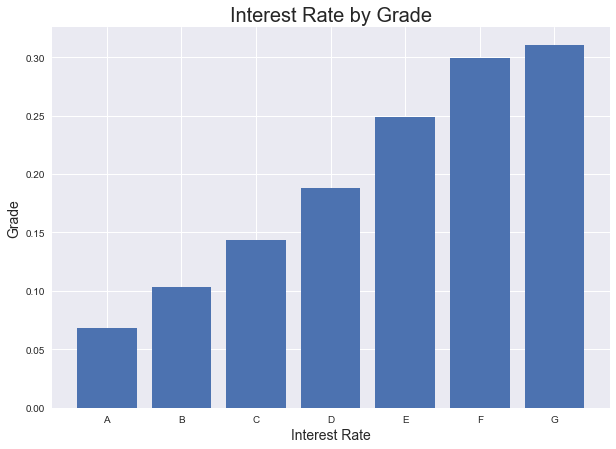

In [25]:
x=RateByGradeL2_df["grade"]
y=RateByGradeL2_df["int_rate"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.bar(x,y)
plt.title("Interest Rate by Grade", fontsize =20)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Grade", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [26]:
LoanTypeByincomeL1_df = LoanStats_df[["title","annual_inc"]]
LoanTypeByincomeL2_df = LoanTypeByincomeL1_df.groupby("title").mean().reset_index()
LoanTypeByincomeL2_df

,title,annual_inc
0,Business,96413.532371
1,Car financing,69116.958816
2,Credit card refinancing,78867.695527
3,Debt consolidation,78041.182772
4,Green loan,62067.118421
5,Home buying,85423.889381
6,Home improvement,91381.763314
7,Learning and training,58000.000000
8,Major purchase,82297.565709
9,Medical expenses,72638.360652


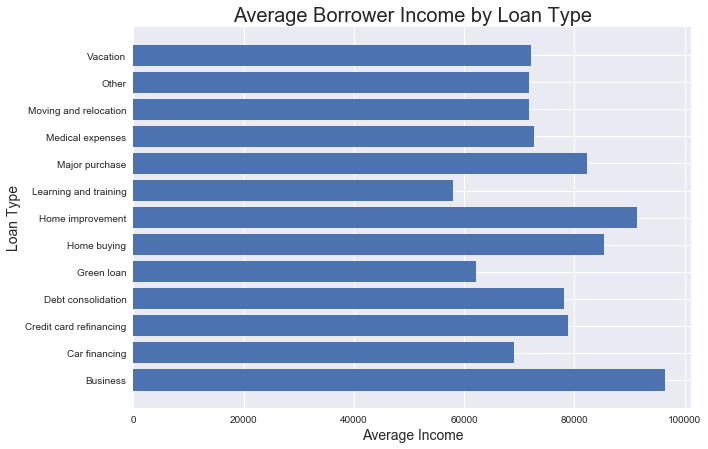

In [27]:
x=LoanTypeByincomeL2_df["title"]
y=LoanTypeByincomeL2_df["annual_inc"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Average Borrower Income by Loan Type", fontsize =20)
plt.xlabel("Average Income", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [28]:
LoanAmountByIncome_df = LoanStats_df[["annual_inc","loan_amnt"]]
LoanAmountByIncome_df.head()

,annual_inc,loan_amnt
0,65000.0,35000
1,65000.0,6000
2,60000.0,40000
3,42000.0,10000
4,68000.0,27000


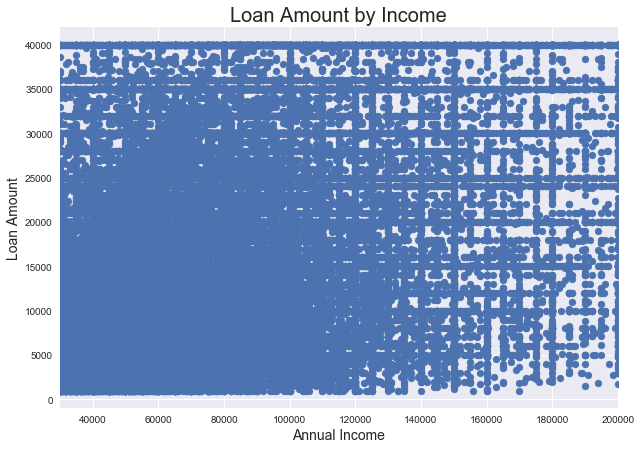

In [29]:
x=LoanAmountByIncome_df["annual_inc"]
y=LoanAmountByIncome_df["loan_amnt"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.scatter(x,y)
plt.title("Loan Amount by Income", fontsize =20)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.xlim(30000,200000)
#plt.ylim(-1,1)
plt.show()

In [30]:
TermByLoanTypeL1_df = LoanStats_df[["title","term"]]
TermByLoanTypeL1_df.head()

,title,term
0,Debt consolidation,60 months
1,Debt consolidation,36 months
2,Debt consolidation,36 months
3,Credit card refinancing,60 months
4,Debt consolidation,60 months


In [31]:
TermByLoanTypeL2_df = pd.DataFrame()
TermByLoanTypeL2_df["Title"] = LoanStats_df["title"]
TermByLoanTypeL2_df["Term"] = TermByLoanTypeL1_df["term"].str.extract('(\d\d)', expand=True)
TermByLoanTypeL2_df['Term'] = pd.to_numeric(TermByLoanTypeL2_df['Term'])
TermByLoanTypeL2_df.head()

,Title,Term
0,Debt consolidation,60
1,Debt consolidation,36
2,Debt consolidation,36
3,Credit card refinancing,60
4,Debt consolidation,60


In [32]:
TermByLoanTypeL2_df.dtypes
TermByLoanTypeL2_df = TermByLoanTypeL2_df.groupby("Title").mean().reset_index()
TermByLoanTypeL2_df

,Title,Term
0,Business,43.249833
1,Car financing,40.893037
2,Credit card refinancing,42.529161
3,Debt consolidation,44.227891
4,Green loan,39.789474
5,Home buying,43.827538
6,Home improvement,43.337174
7,Learning and training,36.000000
8,Major purchase,43.137546
9,Medical expenses,40.985743


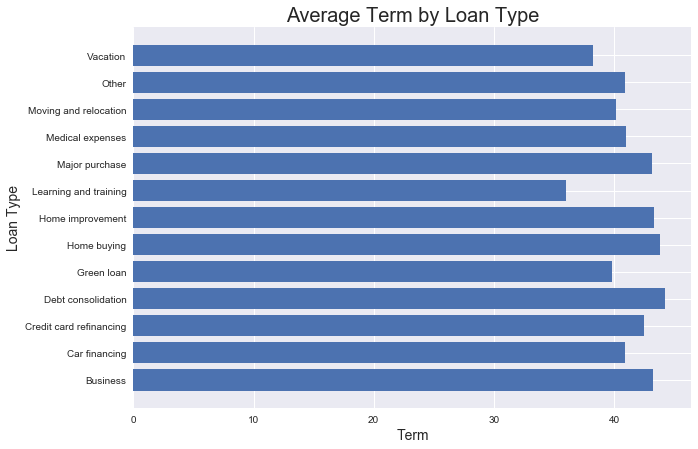

In [33]:
x=TermByLoanTypeL2_df["Title"]
y=TermByLoanTypeL2_df["Term"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Average Term by Loan Type", fontsize =20)
plt.xlabel("Term", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()